# Moount google drive to colab

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Import libraries

In [ ]:
import os
import random 
import numpy as np
import shutil
import time 
from PIL import Image, ImageOps
import cv2
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import tensorflow as tf

from keras import models
from keras import layers
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from keras.utils import np_utils


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.image import ImageDataGenerator

from keras import models, layers, optimizers
from keras.callbacks import ModelCheckpoint
from keras import losses

# Initialize basic working directories

In [ ]:
directory = "drive/MyDrive/Datasets/Sign digits/Dataset"
trainDir = "train"
testDir = "test"
os.chdir(directory)

# Augmented dataframes

In [ ]:
augDir = "augmented/"
classNames_train = os.listdir(augDir+'train/')
classNames_test = os.listdir(augDir+'test/')


classes_train = []
data_train = []
paths_train = []

classes_test = []
data_test = []
paths_test = []

for className in range(0,10):
  temp_train = os.listdir(augDir+'train/'+str(className))
  temp_test = os.listdir(augDir+'test/'+str(className))

  for dataFile in temp_train:
    path_train = augDir+'train/'+str(className)+'/'+dataFile

    paths_train.append(path_train)
    classes_train .append(str(className))
 

  for dataFile in temp_test:
    path_test = augDir+'test/'+str(className)+'/'+dataFile

    paths_test.append(path_test)
    classes_test .append(str(className))

 
augTrain_df = pd.DataFrame({'fileNames': paths_train, 'labels': classes_train})
augTest_df = pd.DataFrame({'fileNames': paths_test, 'labels': classes_test})

In [ ]:
train_df.head(10)

In [ ]:
train_df['labels'].hist(figsize=(10,5))
test_df['labels'].hist(figsize=(10,5))

In [ ]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_df, train_size=0.8)

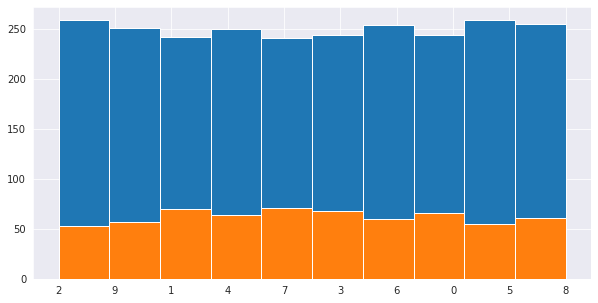

In [ ]:
train_df['labels'].hist(figsize=(10,5))
val_df['labels'].hist(figsize=(10,5))

# Original dataframes


In [ ]:
oriDir = "original/"
classNames_train = os.listdir(oriDir+'train/')
classNames_test = os.listdir(oriDir+'test/')


classes_train = []
data_train = []
paths_train = []

classes_test = []
data_test = []
paths_test = []

classes_val = []
data_val = []
paths_val = []

for className in range(0,10):
  temp_train = os.listdir(oriDir+'train/'+str(className))
  temp_test = os.listdir(oriDir+'test/'+str(className))

  for dataFile in temp_train:
    path_train = oriDir+'train/'+str(className)+'/'+dataFile

    paths_train.append(path_train)
    classes_train .append(str(className))
 
  testSize = [i for i in range(math.floor(len(temp_test)/2),len(temp_test))]
  valSize = [i for i in range(0,math.floor(len(temp_test)/2))]
  for dataFile in testSize:
    path_test = oriDir+'test/'+str(className)+'/'+temp_test[dataFile]

    paths_test.append(path_test)
    classes_test .append(str(className))

  for dataFile in valSize:
    path_val = oriDir+'test/'+str(className)+'/'+temp_test[dataFile]

    paths_val.append(path_val)
    classes_val .append(str(className))

 
originalTrain_df = pd.DataFrame({'fileNames': paths_train, 'labels': classes_train})
originalTest_df = pd.DataFrame({'fileNames': paths_test, 'labels': classes_test})
originalVal_df = pd.DataFrame({'fileNames': paths_val, 'labels': classes_val})

In [ ]:
originalVal_df.head(10)

,fileNames,labels
0,original/test/0/IMG_5537.JPG,0
1,original/test/0/IMG_5042.JPG,0
2,original/test/0/IMG_5816.JPG,0
3,original/test/0/IMG_1169.JPG,0
4,original/test/0/IMG_4986.JPG,0
5,original/test/0/IMG_4996.JPG,0
6,original/test/0/IMG_5446.JPG,0
7,original/test/0/IMG_4316.JPG,0
8,original/test/0/IMG_5796.JPG,0
9,original/test/0/IMG_5318.JPG,0


Check if the dataframes are balanced

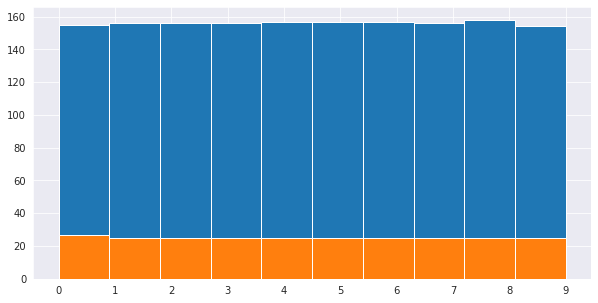

In [ ]:
originalTrain_df['labels'].hist(figsize=(10,5))
originalTest_df['labels'].hist(figsize=(10,5))

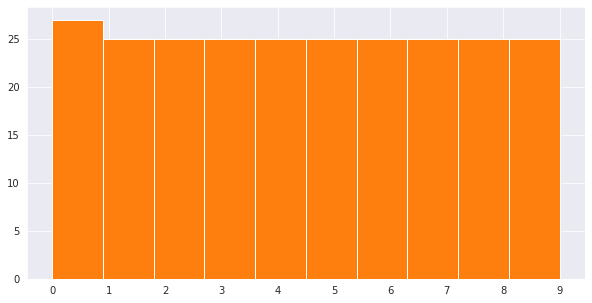

In [ ]:
originalTest_df['labels'].hist(figsize=(10,5))
originalVal_df['labels'].hist(figsize=(10,5))

# Import original dataset 

In [ ]:
originalTrainX=[]
originalTrainY=[]
originalTestX=[]
originalTestY=[]
originalValX=[]
originalValY=[]

iter = -1

#read images from train set
for path in originalTrain_df['fileNames']:
    iter = iter + 1
    #image = np.array((Image.open(path)))
    image = cv2.imread(path)
    originalTrainX.append(image)
    label = originalTrain_df['labels'][iter]
    originalTrainY.append(label)

iter = -1

for path in originalTest_df['fileNames']:
    iter = iter + 1
    #image = np.array((Image.open(path)))
    image = cv2.imread(path)
    originalTestX.append(image)
    originalTestY.append(originalTest_df['labels'][iter])

iter = -1

for path in originalVal_df['fileNames']:
    iter = iter + 1
    #image = np.array((Image.open(path)))
    image = cv2.imread(path)
    originalValX.append(image)
    originalValY.append(originalVal_df['labels'][iter])

originalTrainX = np.array(originalTrainX)
originalTestX = np.array(originalTestX)
originalValX = np.array(originalValX)

    
originalTrainX = originalTrainX / 255
originalTestX = originalTestX / 255
originalValX = originalValX / 255

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


'\n# OneHot Encode the Output\noriginalTrainY = np_utils.to_categorical(originalTrainY, 10)\n#originalTestY = np_utils.to_categorical(originalTestY, 10)\noriginalValY = np_utils.to_categorical(originalValY, 10)\n'

# Exercise 2.a | Simple CNN

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=originalTrain_df,
                                                    x_col="fileNames",
                                                    y_col="labels",
                                                    batch_size=16,
                                                    class_mode="categorical",
                                                    #color_mode="grayscale",
                                                    target_size=(100,100),
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_dataframe(dataframe=originalVal_df,
                                                    x_col="fileNames",
                                                    y_col="labels",
                                                    batch_size=16,
                                                    class_mode="categorical",
                                                    #color_mode="grayscale",
                                                    target_size=(100,100),
                                                    shuffle=True)

test_generator = test_datagen.flow_from_dataframe(dataframe=originalTest_df,
                                                    x_col="fileNames",
                                                    y_col="labels",
                                                    batch_size=16,
                                                    class_mode="categorical",
                                                    #color_mode="grayscale",
                                                    target_size=(100,100),
                                                    shuffle=True)

Found 1562 validated image filenames belonging to 10 classes.
Found 252 validated image filenames belonging to 10 classes.
Found 252 validated image filenames belonging to 10 classes.


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), input_shape=(100, 100, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, (3,3), input_shape=(100, 100, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2560128   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
print("[INFO] Model is training...")
time1 = time.time()   # to measure time taken
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("[INFO] Model is trained.")

[INFO] Model is training...
Epoch 1/100
97/97 [==============================] - 6s 53ms/step - loss: 2.2199 - acc: 0.2027 - val_loss: 0.9514 - val_acc: 0.7222
Epoch 2/100
97/97 [==============================] - 5s 48ms/step - loss: 0.8417 - acc: 0.7169 - val_loss: 0.7187 - val_acc: 0.8056
Epoch 3/100
97/97 [==============================] - 5s 48ms/step - loss: 0.5178 - acc: 0.8333 - val_loss: 0.5953 - val_acc: 0.8135
Epoch 4/100
97/97 [==============================] - 5s 48ms/step - loss: 0.4457 - acc: 0.8397 - val_loss: 0.6280 - val_acc: 0.7976
Epoch 5/100
97/97 [==============================] - 5s 49ms/step - loss: 0.3309 - acc: 0.8978 - val_loss: 0.6414 - val_acc: 0.8294
Epoch 6/100
97/97 [==============================] - 5s 48ms/step - loss: 0.2326 - acc: 0.9331 - val_loss: 0.5590 - val_acc: 0.8294
Epoch 7/100
97/97 [==============================] - 5s 49ms/step - loss: 0.1761 - acc: 0.9436 - val_loss: 0.5895 - val_acc: 0.8214
Epoch 8/100
97/97 [=============================

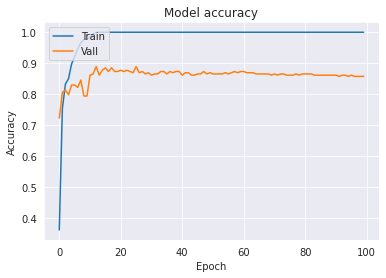

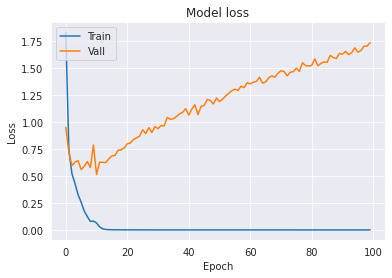

In [ ]:
import matplotlib.pyplot as plot
plot.plot(history.history['acc'])
plot.plot(history.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Vall'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Vall'], loc='upper left')
plot.show()

score = model.evaluate(test_generator)

print('===Testing loss and accuracy===')
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

# Exercise 2.b | Underfitting, best number of epochs

In [ ]:
model_b = models.Sequential()

model_b.add(layers.Conv2D(64, (3,3), input_shape=(100, 100, 3), padding='same', activation='relu'))
model_b.add(layers.MaxPooling2D(pool_size=(2,2)))
model_b.add(layers.Conv2D(32, (3,3), input_shape=(100, 100, 3), padding='same', activation='relu'))
model_b.add(layers.MaxPooling2D(pool_size=(2,2)))
model_b.add(layers.Flatten())
model_b.add(layers.Dense(128, activation='relu'))
model_b.add(layers.Dense(10, activation='softmax'))

model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2560128   
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [ ]:
print("[INFO] Model is training...")
time1 = time.time()   # to measure time taken
# Compile the model
model_b.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])

history_b = model_b.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("[INFO] Model is trained.")

[INFO] Model is training...
Epoch 1/15
97/97 [==============================] - 13s 56ms/step - loss: 2.2456 - acc: 0.2021 - val_loss: 1.1371 - val_acc: 0.7143
Epoch 2/15
97/97 [==============================] - 5s 51ms/step - loss: 0.8271 - acc: 0.7223 - val_loss: 0.7744 - val_acc: 0.7698
Epoch 3/15
97/97 [==============================] - 5s 55ms/step - loss: 0.5582 - acc: 0.8057 - val_loss: 0.6185 - val_acc: 0.7976
Epoch 4/15
97/97 [==============================] - 5s 50ms/step - loss: 0.4367 - acc: 0.8739 - val_loss: 0.5502 - val_acc: 0.8333
Epoch 5/15
97/97 [==============================] - 5s 51ms/step - loss: 0.2786 - acc: 0.9085 - val_loss: 0.5475 - val_acc: 0.8254
Epoch 6/15
97/97 [==============================] - 5s 50ms/step - loss: 0.2232 - acc: 0.9388 - val_loss: 0.5693 - val_acc: 0.8095
Epoch 7/15
97/97 [==============================] - 5s 49ms/step - loss: 0.1727 - acc: 0.9424 - val_loss: 0.5474 - val_acc: 0.8254
Epoch 8/15
97/97 [==============================] - 5s

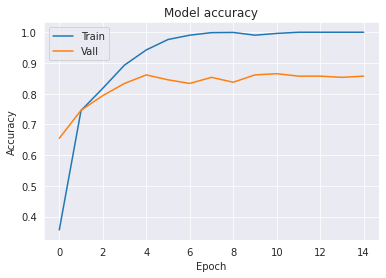

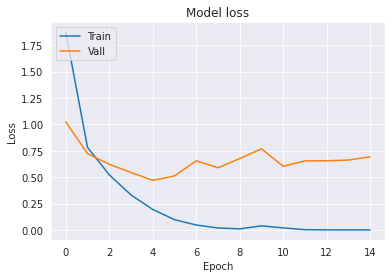

In [ ]:
import matplotlib.pyplot as plot
plot.plot(history_b.history['acc'])
plot.plot(history_b.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Vall'], loc='upper left')
plot.show()

plot.plot(history_b.history['loss'])
plot.plot(history_b.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Vall'], loc='upper left')
plot.show()

In [ ]:
score = model_b.evaluate(test_generator)

print('===Testing loss and accuracy===')
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

16/16 [==============================] - 1s 35ms/step - loss: 0.6714 - acc: 0.8889
===Testing loss and accuracy===
Test loss:  0.6714133024215698
Test accuracy:  0.8888888955116272


In [ ]:
def evaluate_model(model, X_test, labels):
    
    labels = np.array(labels)
    labels = labels.astype(int)
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    
    cm = confusion_matrix(labels, y_pred)
    clr = classification_report(labels, y_pred)
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

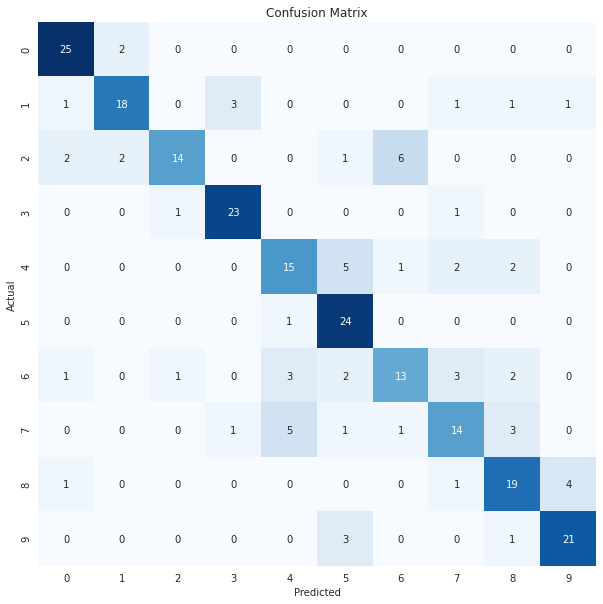

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.82      0.72      0.77        25
           2       0.88      0.56      0.68        25
           3       0.85      0.92      0.88        25
           4       0.62      0.60      0.61        25
           5       0.67      0.96      0.79        25
           6       0.62      0.52      0.57        25
           7       0.64      0.56      0.60        25
           8       0.68      0.76      0.72        25
           9       0.81      0.84      0.82        25

    accuracy                           0.74       252
   macro avg       0.74      0.74      0.73       252
weighted avg       0.74      0.74      0.73       252



In [ ]:
evaluate_model(model_b,originalTestX,originalTestY)

# Exercise 2.c | CNN variations, best architecture

In [ ]:
model_c = models.Sequential()

model_c.add(layers.Conv2D(64, (3,3), input_shape=(100, 100, 3), padding='same', activation='relu'))
model.add(BatchNomralization(momentum=0.1))
model_c.add(layers.MaxPooling2D(pool_size=(2,2)))
model_c.add(layers.Conv2D(32, (3,3), input_shape=(100, 100, 3), padding='same', activation='relu'))
model.add(BatchNomralization(momentum=0.1))
model_c.add(layers.MaxPooling2D(pool_size=(2,2)))
model_c.add(layers.Conv2D(16, (3,3), input_shape=(100, 100, 3), padding='same', activation='relu'))
model.add(BatchNomralization(momentum=0.1))
model_c.add(layers.MaxPooling2D(pool_size=(2,2)))
model_c.add(layers.Flatten())
model_c.add(layers.Dense(128, activation='relu'))
model_c.add(layers.Dense(10, activation='softmax'))

model_c.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 50, 50, 32)        18464     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 25, 25, 16)        4624      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2304)            

In [ ]:
print("[INFO] Model is training...")
# Compile the model
model_c.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])

history_c = model_c.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("[INFO] Model is trained.")

In [ ]:
score = model_c.evaluate(test_generator)

print('===Testing loss and accuracy===')
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

16/16 [==============================] - 1s 35ms/step - loss: 0.6731 - acc: 0.9048
===Testing loss and accuracy===
Test loss:  0.6731002926826477
Test accuracy:  0.9047619104385376


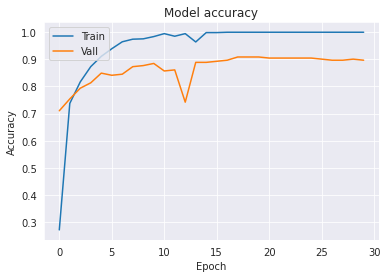

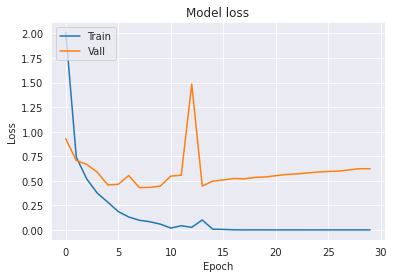

In [ ]:
import matplotlib.pyplot as plot
plot.plot(history_c.history['acc'])
plot.plot(history_c.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Vall'], loc='upper left')
plot.show()

plot.plot(history_c.history['loss'])
plot.plot(history_c.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Vall'], loc='upper left')
plot.show()

# Exercise 2.d | Use batch normalization

In [ ]:
model_d = models.Sequential()

model_d.add(layers.Conv2D(64, (3,3), input_shape=(100, 100, 3), padding='same', activation='relu'))
model_d.add(layers.BatchNormalization(momentum=0.1))
#model_d.add(layers.BatchNormalization())
model_d.add(layers.MaxPooling2D(pool_size=(2,2)))
model_d.add(layers.Conv2D(32, (3,3), input_shape=(100, 100, 3), padding='same', activation='relu'))
model_d.add(layers.BatchNormalization(momentum=0.1))
#model_d.add(layers.BatchNormalization())
model_d.add(layers.MaxPooling2D(pool_size=(2,2)))
model_d.add(layers.Flatten())
model_d.add(layers.Dense(128, activation='relu'))
model_d.add(layers.Dense(10, activation='softmax'))

model_d.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 100, 100, 64)      1792      
_________________________________________________________________
batch_normalization_4 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 32)        18464     
_________________________________________________________________
batch_normalization_5 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20000)            

In [ ]:
print("[INFO] Model is training...")
# Compile the model
model_d.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])

history_d = model_d.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
)
#print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("[INFO] Model is trained.")

[INFO] Model is training...
Epoch 1/15
97/97 [==============================] - 6s 52ms/step - loss: 5.0921 - acc: 0.2836 - val_loss: 1.7233 - val_acc: 0.5278
Epoch 2/15
97/97 [==============================] - 5s 50ms/step - loss: 1.1354 - acc: 0.6407 - val_loss: 0.9201 - val_acc: 0.7262
Epoch 3/15
97/97 [==============================] - 5s 50ms/step - loss: 0.5822 - acc: 0.8155 - val_loss: 0.9977 - val_acc: 0.6944
Epoch 4/15
97/97 [==============================] - 5s 50ms/step - loss: 0.4015 - acc: 0.8551 - val_loss: 0.9442 - val_acc: 0.7659
Epoch 5/15
97/97 [==============================] - 5s 51ms/step - loss: 0.2388 - acc: 0.9130 - val_loss: 0.5728 - val_acc: 0.8294
Epoch 6/15
97/97 [==============================] - 5s 50ms/step - loss: 0.0840 - acc: 0.9716 - val_loss: 0.4130 - val_acc: 0.8810
Epoch 7/15
97/97 [==============================] - 5s 49ms/step - loss: 0.0341 - acc: 0.9914 - val_loss: 0.4413 - val_acc: 0.8611
Epoch 8/15
97/97 [==============================] - 5s 

In [ ]:
score = model_d.evaluate(test_generator)

print('===Testing loss and accuracy===')
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

16/16 [==============================] - 1s 37ms/step - loss: 0.5469 - acc: 0.8889
===Testing loss and accuracy===
Test loss:  0.5468953847885132
Test accuracy:  0.8888888955116272


In [ ]:
import matplotlib.pyplot as plot
plot.plot(history_d.history['acc'])
plot.plot(history_d.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Vall'], loc='upper left')
plot.show()

plot.plot(history_d.history['loss'])
plot.plot(history_d.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Vall'], loc='upper left')
plot.show()

# Exercise 1.e | Without dense and pooling layers

In [ ]:
model_e1 = models.Sequential()

model_e1.add(layers.Conv2D(64, (3,3), input_shape=(100, 100, 3), padding='same', activation='relu'))
#model.add(BatchNomralization(momentum=0.1))
#model_d.add(layers.BatchNormalization())
#model_e1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_e1.add(layers.Conv2D(32, (3,3), input_shape=(100, 100, 3), padding='same', activation='relu'))
#model.add(BatchNomralization(momentum=0.1))
#model_d.add(layers.BatchNormalization())
#model_e1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_e1.add(layers.Flatten())
#model_d.add(layers.Dense(128, activation='relu'))
model_e1.add(layers.Dense(10, activation='softmax'))

model_e1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 32)      18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3200010   
Total params: 3,220,266
Trainable params: 3,220,266
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("[INFO] Model is training...")
# Compile the model
model_e1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])

history_e1 = model_e1.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("[INFO] Model is trained.")

In [ ]:
model_e2 = models.Sequential()

model_e2.add(layers.Conv2D(64, (3,3), input_shape=(100, 100, 3), padding='same', activation='relu'))
#model.add(BatchNomralization(momentum=0.1))
#model_d.add(layers.BatchNormalization())
#model_e2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_e2.add(layers.Conv2D(32, (3,3), input_shape=(100, 100, 3), padding='same', activation='relu'))
#model.add(BatchNomralization(momentum=0.1))
#model_d.add(layers.BatchNormalization())
#model_e2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_e2.add(layers.Flatten())
model_e2.add(layers.Dense(128, activation='relu'))
model_e2.add(layers.Dense(10, activation='softmax'))

model_e2.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 100, 100, 32)      18464     
_________________________________________________________________
flatten_43 (Flatten)         (None, 320000)            0         
_________________________________________________________________
dense_79 (Dense)             (None, 128)               40960128  
_________________________________________________________________
dense_80 (Dense)             (None, 10)                1290      
Total params: 40,981,674
Trainable params: 40,981,674
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("[INFO] Model is training...")
# Compile the model
model_e2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])

history_e2 = model_e2.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("[INFO] Model is trained.")

In [ ]:
score = model_e2.evaluate(test_generator)

print('===Testing loss and accuracy===')
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])